In [2]:
import ipdb
import numpy as np
import xarray as xr
import matplotlib.pyplot as plt
import pandas as pd
import matplotlib.pylab as pylab
import cartopy
import cartopy.crs as ccrs
import pickle as pkl
import glob
from metpy import calc
from metpy.units import units

pylab.rcParams['figure.figsize'] = (10., 10.)
%matplotlib inline

In [1]:
cd ..

/home/users/cornkle/pythonWorkspace/proj_CEH


In [12]:
cp4_path = '/gws/nopw/j04/lmcs/cklein/CP_models/MCS_files/WAf/CP4_box_JASMIN/instantaneous_18h_v1/'

In [17]:
def get_clim(direction='XDIR', strs='18'):

    file = 'hist_anom_all_'+strs+'h_'+direction+'.nc'
    filem = 'hist_mean_all_'+strs+'h_'+direction+'.nc'
    file2 = 'fut_anom_all_'+strs+'h_'+direction+'.nc'
    file2m = 'fut_mean_all_'+strs+'h_'+direction+'.nc'
    
    file2d = 'hist_anom_all_'+strs+'h_2d.nc'
    file2d2 = 'fut_anom_all_'+strs+'h_2d.nc'
    file2d_mean = 'hist_mean_all_'+strs+'h_2d.nc'
    file2d2_mean = 'fut_mean_all_'+strs+'h_2d.nc'

    sliceval= [-6 ,-6]   # -6,6
    
    ###########################
    
    ds = xr.open_dataset(cp4_path+file)
    ds2 = xr.open_dataset(cp4_path+file2)
    
    ds_mean = xr.open_dataset(cp4_path+filem)
    ds2_mean = xr.open_dataset(cp4_path+file2m)
    
    #######################################
    
    ds2d = xr.open_dataset(cp4_path+file2d)
    ds2d2 = xr.open_dataset(cp4_path+file2d2)
    
    
    if direction == 'XDIR':
        ds2d = ds2d.sel(latitude=slice(sliceval[0],sliceval[1])).mean('latitude')
        ds2d2 = ds2d2.sel(latitude=slice(sliceval[0],sliceval[1])).mean('latitude')
    if direction == 'YDIR':
        ds2d = ds2d.sel(longitude=slice(sliceval[0],sliceval[1])).mean('longitude')
        ds2d2 = ds2d2.sel(longitude=slice(sliceval[0],sliceval[1])).mean('longitude')
    ds3 = ds2d[['t2', 'q2','u_srfc', 'v_srfc']].rename({'t2' : 't_cross', 'q2' : 'q_cross', 'u_srfc' : 'u_cross', 'v_srfc' : 'v_cross'})
    ds32 = ds2d2[['t2', 'q2','u_srfc', 'v_srfc']].rename({'t2' : 't_cross', 'q2' : 'q_cross', 'u_srfc' : 'u_cross',  'v_srfc' : 'v_cross'})
    
    merged_hist = ds[['t_cross', 'q_cross', 'u_cross', 'v_cross']]
    merged_fut = ds2[['t_cross', 'q_cross', 'u_cross', 'v_cross']]
    
    # Add pressure level dimension to the extra dataset
    pressure_level_980 = 980  # Define the pressure level value
    ds3 = ds3.expand_dims(dim={'pressure': [pressure_level_980]})
    ds3 = ds3.assign_coords(pressure=('pressure', [pressure_level_980]))
    merged_hist = xr.concat([ds3, merged_hist], dim='pressure')
    
    ds32 = ds32.expand_dims(dim={'pressure': [pressure_level_980]})
    ds32 = ds32.assign_coords(pressure=('pressure', [pressure_level_980]))
    merged_fut = xr.concat([ds32, merged_fut], dim='pressure')
    
    #####################################
    
    #######################################
    
    ds2d = xr.open_dataset(cp4_path+file2d_mean)
    ds2d2 = xr.open_dataset(cp4_path+file2d2_mean)

    
    if direction == 'XDIR':
        ds2d = ds2d.sel(latitude=slice(sliceval[0],sliceval[1])).mean('latitude')
        ds2d2 = ds2d2.sel(latitude=slice(sliceval[0],sliceval[1])).mean('latitude')
    if direction == 'YDIR':
        ds2d = ds2d.sel(longitude=slice(sliceval[0],sliceval[1])).mean('longitude')
        ds2d2 = ds2d2.sel(longitude=slice(sliceval[0],sliceval[1])).mean('longitude')
    ds3_m = ds2d[['t2', 'q2','u_srfc', 'v_srfc']].rename({'t2' : 't_cross', 'q2' : 'q_cross', 'u_srfc' : 'u_cross', 'v_srfc' : 'v_cross'})
    ds32_m = ds2d2[['t2', 'q2','u_srfc', 'v_srfc']].rename({'t2' : 't_cross', 'q2' : 'q_cross', 'u_srfc' : 'u_cross',  'v_srfc' : 'v_cross'})
    
    merged_hist_mean = ds_mean[['t_cross', 'q_cross', 'u_cross', 'v_cross']]
    merged_fut_mean = ds2_mean[['t_cross', 'q_cross', 'u_cross', 'v_cross']]
    
    # Add pressure level dimension to the extra dataset
    pressure_level_980 = 980  # Define the pressure level value
    ds3_m = ds3_m.expand_dims(dim={'pressure': [pressure_level_980]})
    ds3_m = ds3_m.assign_coords(pressure=('pressure', [pressure_level_980]))
    merged_hist_mean = xr.concat([ds3_m, merged_hist_mean], dim='pressure')
    
    ds32_m = ds32_m.expand_dims(dim={'pressure': [pressure_level_980]})
    ds32_m = ds32_m.assign_coords(pressure=('pressure', [pressure_level_980]))
    merged_fut_mean = xr.concat([ds32_m, merged_fut_mean], dim='pressure')
    
    merged_hist_clim = merged_hist_mean-merged_hist
    merged_fut_clim = merged_fut_mean-merged_fut

    return merged_hist_clim, merged_fut_clim

In [18]:
def get_anom_and_mean(direction='XDIR', strs='18'):

    file = 'hist_anom_all_'+strs+'h_'+direction+'.nc'
    filem = 'hist_mean_all_'+strs+'h_'+direction+'.nc'
    file2 = 'fut_anom_all_'+strs+'h_'+direction+'.nc'
    file2m = 'fut_mean_all_'+strs+'h_'+direction+'.nc'
    
    file2d = 'hist_anom_all_'+strs+'h_2d.nc'
    file2d2 = 'fut_anom_all_'+strs+'h_2d.nc'
    file2d_mean = 'hist_mean_all_'+strs+'h_2d.nc'
    file2d2_mean = 'fut_mean_all_'+strs+'h_2d.nc'

    sliceval= [-6 ,6] 
    
    ###########################
    
    ds = xr.open_dataset(cp4_path+file)
    ds2 = xr.open_dataset(cp4_path+file2)
    
    ds_mean = xr.open_dataset(cp4_path+filem)
    ds2_mean = xr.open_dataset(cp4_path+file2m)
    
    #######################################
    
    ds2d = xr.open_dataset(cp4_path+file2d)
    ds2d2 = xr.open_dataset(cp4_path+file2d2)

    if direction == 'XDIR':
        ds2d = ds2d.sel(latitude=slice(sliceval[0],sliceval[1])).mean('latitude')
        ds2d2 = ds2d2.sel(latitude=slice(sliceval[0],sliceval[1])).mean('latitude')
    if direction == 'YDIR':
        ds2d = ds2d.sel(longitude=slice(sliceval[0],sliceval[1])).mean('longitude')
        ds2d2 = ds2d2.sel(longitude=slice(sliceval[0],sliceval[1])).mean('longitude')
        
    ds3 = ds2d[['t2', 'q2','u_srfc', 'v_srfc']].rename({'t2' : 't_cross', 'q2' : 'q_cross', 'u_srfc' : 'u_cross', 'v_srfc' : 'v_cross'})
    ds32 = ds2d2[['t2', 'q2','u_srfc', 'v_srfc']].rename({'t2' : 't_cross', 'q2' : 'q_cross', 'u_srfc' : 'u_cross',  'v_srfc' : 'v_cross'})
    
    merged_hist = ds[['t_cross', 'q_cross', 'u_cross', 'v_cross']]
    merged_fut = ds2[['t_cross', 'q_cross', 'u_cross', 'v_cross']]
    
    # Add pressure level dimension to the extra dataset
    pressure_level_980 = 980  # Define the pressure level value
    ds3 = ds3.expand_dims(dim={'pressure': [pressure_level_980]})
    ds3 = ds3.assign_coords(pressure=('pressure', [pressure_level_980]))
    merged_hist = xr.concat([ds3, merged_hist], dim='pressure')
    
    ds32 = ds32.expand_dims(dim={'pressure': [pressure_level_980]})
    ds32 = ds32.assign_coords(pressure=('pressure', [pressure_level_980]))
    merged_fut = xr.concat([ds32, merged_fut], dim='pressure')
    
    #####################################
    
    #######################################
    
    ds2d = xr.open_dataset(cp4_path+file2d_mean)
    ds2d2 = xr.open_dataset(cp4_path+file2d2_mean)

    if direction == 'XDIR':
        ds2d = ds2d.sel(latitude=slice(sliceval[0],sliceval[1])).mean('latitude')
        ds2d2 = ds2d2.sel(latitude=slice(sliceval[0],sliceval[1])).mean('latitude')
    if direction == 'YDIR':
        ds2d = ds2d.sel(longitude=slice(sliceval[0],sliceval[1])).mean('longitude')
        ds2d2 = ds2d2.sel(longitude=slice(sliceval[0],sliceval[1])).mean('longitude')
        
    ds3_m = ds2d[['t2', 'q2','u_srfc', 'v_srfc']].rename({'t2' : 't_cross', 'q2' : 'q_cross', 'u_srfc' : 'u_cross', 'v_srfc' : 'v_cross'})
    ds32_m = ds2d2[['t2', 'q2','u_srfc', 'v_srfc']].rename({'t2' : 't_cross', 'q2' : 'q_cross', 'u_srfc' : 'u_cross',  'v_srfc' : 'v_cross'})
    
    merged_hist_mean = ds_mean[['t_cross', 'q_cross', 'u_cross', 'v_cross']]
    merged_fut_mean = ds2_mean[['t_cross', 'q_cross', 'u_cross', 'v_cross']]
    
    # Add pressure level dimension to the extra dataset
    pressure_level_980 = 980  # Define the pressure level value
    ds3_m = ds3_m.expand_dims(dim={'pressure': [pressure_level_980]})
    ds3_m = ds3_m.assign_coords(pressure=('pressure', [pressure_level_980]))
    merged_hist_mean = xr.concat([ds3_m, merged_hist_mean], dim='pressure')
    
    ds32_m = ds32_m.expand_dims(dim={'pressure': [pressure_level_980]})
    ds32_m = ds32_m.assign_coords(pressure=('pressure', [pressure_level_980]))
    merged_fut_mean = xr.concat([ds32_m, merged_fut_mean], dim='pressure')

    return merged_hist, merged_fut, merged_hist_mean, merged_fut_mean

NameError: name 'ds_mean' is not defined

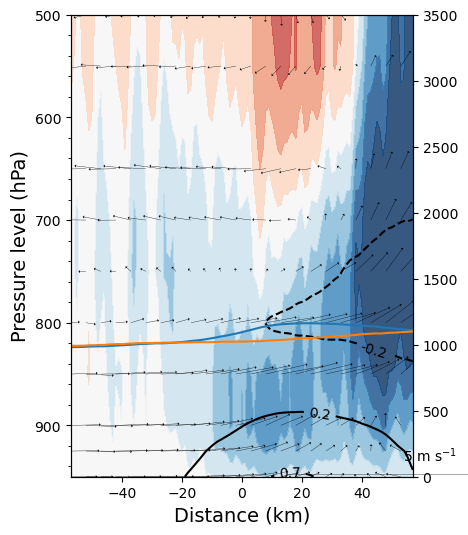

In [19]:
strs='18'
direction='XDIR'
merged_hist, merged_fut, merged_hist_mean, merged_fut_mean = get_anom_and_mean(direction='XDIR', strs=strs)
file = 'hist_anom_all_'+strs+'h_'+direction+'.nc'
file2 = 'fut_anom_all_'+strs+'h_'+direction+'.nc'

mean = 'hist_mean_all_'+strs+'h_'+direction+'.nc'
mean2 = 'fut_mean_all_'+strs+'h_'+direction+'.nc'
    
ds = xr.open_dataset(cp4_path+file)
ds2 = xr.open_dataset(cp4_path+file2)

mean = xr.open_dataset(cp4_path+mean)


from matplotlib.ticker import MultipleLocator, AutoMinorLocator
st=1
sarrow = 0

lowres= 5

ucross = ds['u_cross']
cross = ds['omega_cross']*3

xquiv = ucross.longitude[sarrow::lowres]
yquiv = ucross.pressure[sarrow::st]

uu = ucross[sarrow::st, sarrow::lowres]
vv = cross[sarrow::st, sarrow::lowres]

f = plt.figure(figsize=(15,6), dpi=100)

for idx, data in enumerate([ds, ds2]):

    ax = f.add_subplot(1,3,idx+1)

    mp=ax.contourf(data.longitude, ds.pressure, (data['omega_cross'])*10, cmap='RdBu_r',levels=np.linspace(-0.9,0.9,10), alpha=0.8, extend='both') #levels=np.linspace(-70,5,50), 
    
    plt.gca().invert_yaxis()
    
    qv = ax.quiver(xquiv, yquiv, uu, vv*-1, scale=6, width=0.001, headwidth=9)
    plt.quiverkey(qv,1.05, 0.005, 5, r'5 m s$^{-1}$')
    
    num = ax.contour(data.longitude, ds.pressure, (data['t_cross']), colors='k',levels=np.linspace(-2,2,10), alpha=1, extend='both') #levels=np.linspace(-70,5,50), 
    #ax.contour(ds_mean.longitude, ds_mean.pressure, (ds_mean['q_cross']-ds['q_cross'])*1000, colors='k',levels=np.linspace(12,15,10), alpha=1, extend='both') #levels=np.linspace(-70,5,50), 
    ax.clabel(num, inline=True, fontsize=10, fmt='%1.1f')
    
    # Set major ticks locator for the y-axis to be every 100 steps
    ax.yaxis.set_major_locator(MultipleLocator(100))
    
    # Set minor ticks locator for the y-axis to be every 20 steps
    ax.yaxis.set_minor_locator(MultipleLocator(20))
    #ax.set_ylim(980,600)
    
    ax.set_xlabel('Distance (km)', fontsize=14)
    ax.set_ylabel('Pressure level (hPa)', fontsize=14)
    ax2 = ax.twinx()

    if idx == 0:
        ax2.plot(data.longitude, mean['pblH'], label='PBLH_stormD hist')
        ax2.plot(data.longitude, mean['pblH']-ds['pblH'], label='PBLH_clim hist')
    # else:
    #     ax2.plot(merged_hist.longitude, ds2_mean['pblH'], label='PBLH_stormD fut')
    #     ax2.plot(ds_mean.longitude, ds2_mean['pblH']-ds2['pblH'], label='PBLH_clim fut')
        
    ax2.set_ylim(0,3500)
    print((ds_mean['pblH']-ds['pblH']).max())
    print((ds_mean['pblH']).max())

    
    plt.title('', fontsize=14)
    
    # cbar.label('Relative humidity (%)')
    plt.title('1200 UTC for 1800 UTC storm')
    plt.legend()
    
    plt.tight_layout()
    f.subplots_adjust(right=0.87)
    cax = f.add_axes([0.97, 0.11, 0.02, 0.8])
    cbar = f.colorbar(mp, cax)
    cbar.set_label('Temperature anomaly (K)', fontsize=14)


ax = f.add_subplot(1,3,3)

mp=ax.contourf(data.longitude, ds.pressure, (ds2['omega_cross']-ds['omega_cross'])*10, cmap='RdBu_r',levels=np.linspace(-0.9,0.9,10), alpha=0.8, extend='both') #levels=np.linspace(-70,5,50), 

qv = ax.quiver(xquiv, yquiv, uu, vv*-1, scale=6, width=0.001, headwidth=9)
plt.quiverkey(qv,1.05, 0.005, 5, r'5 m s$^{-1}$')

num = ax.contour(data.longitude, data.pressure, (merged_fut['t_cross']-merged_hist['t_cross']), colors='k',levels=np.linspace(-2,2,10), alpha=1, extend='both') #levels=np.linspace(-70,5,50), 
#ax.contour(ds_mean.longitude, ds_mean.pressure, (ds_mean['q_cross']-ds['q_cross'])*1000, colors='k',levels=np.linspace(12,15,10), alpha=1, extend='both') #levels=np.linspace(-70,5,50), 
ax.clabel(num, inline=True, fontsize=10, fmt='%1.1f')

# Set major ticks locator for the y-axis to be every 100 steps
ax.yaxis.set_major_locator(MultipleLocator(100))

# Set minor ticks locator for the y-axis to be every 20 steps
ax.yaxis.set_minor_locator(MultipleLocator(20))
ax.set_ylim(980,600)

ax.set_xlabel('Distance (km)', fontsize=14)
ax.set_ylabel('Pressure level (hPa)', fontsize=14)

plt.title('', fontsize=14)

# cbar.label('Relative humidity (%)')
plt.title('1200 UTC for 1800 UTC storm')
plt.legend()

plt.tight_layout()
f.subplots_adjust(right=0.87)
cax = f.add_axes([0.97, 0.11, 0.02, 0.8])
cbar = f.colorbar(mp, cax)
cbar.set_label('Temperature anomaly (K)', fontsize=14)


f.savefig('cross_18hstorms_xdir.png')

NameError: name 'ds_mean' is not defined

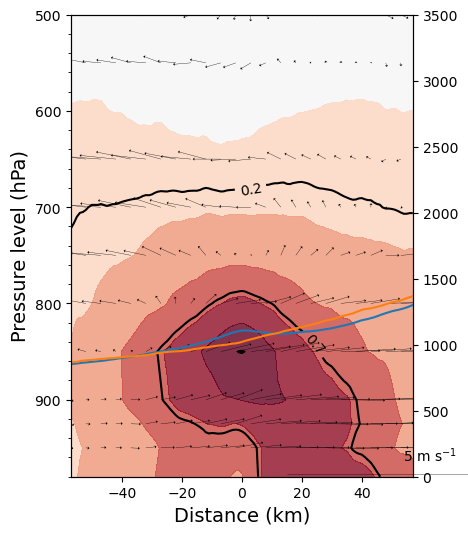

In [16]:
direction = 'YDIR'
strs='18'
merged_hist, merged_fut, merged_hist_mean, merged_fut_mean = get_anom_and_mean(direction='YDIR', strs='18')

file = 'hist_anom_all_'+strs+'h_'+direction+'.nc'
file2 = 'fut_anom_all_'+strs+'h_'+direction+'.nc'

mean = 'hist_mean_all_'+strs+'h_'+direction+'.nc'
mean2 = 'fut_mean_all_'+strs+'h_'+direction+'.nc'
    
ds = xr.open_dataset(cp4_path+file)
ds2 = xr.open_dataset(cp4_path+file2)

mean = xr.open_dataset(cp4_path+mean)

from matplotlib.ticker import MultipleLocator, AutoMinorLocator
st=1
sarrow = 0

lowres= 5

ucross = ds['u_cross']
cross = ds['omega_cross']*3

xquiv = ucross.latitude[sarrow::lowres]
yquiv = ucross.pressure[sarrow::st]

uu = ucross[sarrow::st, sarrow::lowres]
vv = cross[sarrow::st, sarrow::lowres]

f = plt.figure(figsize=(15,6), dpi=100)

for idx, data in enumerate([merged_hist, merged_fut]):

    ax = f.add_subplot(1,3,idx+1)

    mp=ax.contourf(data.latitude, data.pressure, (data['q_cross'])*1000, cmap='RdBu_r',levels=np.linspace(-0.9,0.9,10), alpha=0.8, extend='both') #levels=np.linspace(-70,5,50), 
    
    plt.gca().invert_yaxis()
    
    qv = ax.quiver(xquiv, yquiv, uu, vv*-1, scale=6, width=0.001, headwidth=9)
    plt.quiverkey(qv,1.05, 0.005, 5, r'5 m s$^{-1}$')
    
    num = ax.contour(data.latitude, data.pressure, (data['q_cross'])*1000, colors='k',levels=np.linspace(-2,2,10), alpha=1, extend='both') #levels=np.linspace(-70,5,50), 
    #ax.contour(ds_mean.longitude, ds_mean.pressure, (ds_mean['q_cross']-ds['q_cross'])*1000, colors='k',levels=np.linspace(12,15,10), alpha=1, extend='both') #levels=np.linspace(-70,5,50), 
    ax.clabel(num, inline=True, fontsize=10, fmt='%1.1f')
    
    # Set major ticks locator for the y-axis to be every 100 steps
    ax.yaxis.set_major_locator(MultipleLocator(100))
    
    # Set minor ticks locator for the y-axis to be every 20 steps
    ax.yaxis.set_minor_locator(MultipleLocator(20))
    #ax.set_ylim(980,600)
    
    ax.set_xlabel('Distance (km)', fontsize=14)
    ax.set_ylabel('Pressure level (hPa)', fontsize=14)
    ax2 = ax.twinx()

    if idx == 0:
        ax2.plot(data.latitude, mean['pblH'], label='PBLH_stormD hist')
        ax2.plot(data.latitude, mean['pblH']-ds['pblH'], label='PBLH_clim hist')
    # else:
    #     ax2.plot(merged_hist.longitude, ds2_mean['pblH'], label='PBLH_stormD fut')
    #     ax2.plot(ds_mean.longitude, ds2_mean['pblH']-ds2['pblH'], label='PBLH_clim fut')
        
    ax2.set_ylim(0,3500)
    print((ds_mean['pblH']-ds['pblH']).max())
    print((ds_mean['pblH']).max())

    
    plt.title('', fontsize=14)
    
    # cbar.label('Relative humidity (%)')
    plt.title('1200 UTC for 1800 UTC storm')
    plt.legend()
    
    plt.tight_layout()
    f.subplots_adjust(right=0.87)
    cax = f.add_axes([0.97, 0.11, 0.02, 0.8])
    cbar = f.colorbar(mp, cax)
    cbar.set_label('Temperature anomaly (K)', fontsize=14)


ax = f.add_subplot(1,3,3)

mp=ax.contourf(data.latitude, data.pressure, (merged_fut['t_cross']-merged_hist['t_cross']), cmap='RdBu_r',levels=np.linspace(-0.9,0.9,10), alpha=0.8, extend='both') #levels=np.linspace(-70,5,50), 

qv = ax.quiver(xquiv, yquiv, uu, vv*-1, scale=6, width=0.001, headwidth=9)
plt.quiverkey(qv,1.05, 0.005, 5, r'5 m s$^{-1}$')

num = ax.contour(data.latitude, data.pressure, (merged_fut['q_cross']-merged_hist['q_cross'])*1000, colors='k',levels=np.linspace(-2,2,10), alpha=1, extend='both') #levels=np.linspace(-70,5,50), 
#ax.contour(ds_mean.longitude, ds_mean.pressure, (ds_mean['q_cross']-ds['q_cross'])*1000, colors='k',levels=np.linspace(12,15,10), alpha=1, extend='both') #levels=np.linspace(-70,5,50), 
ax.clabel(num, inline=True, fontsize=10, fmt='%1.1f')

# Set major ticks locator for the y-axis to be every 100 steps
ax.yaxis.set_major_locator(MultipleLocator(100))

# Set minor ticks locator for the y-axis to be every 20 steps
ax.yaxis.set_minor_locator(MultipleLocator(20))
ax.set_ylim(980,600)

ax.set_xlabel('Distance (km)', fontsize=14)
ax.set_ylabel('Pressure level (hPa)', fontsize=14)

plt.title('', fontsize=14)

# cbar.label('Relative humidity (%)')
plt.title('1200 UTC for 1800 UTC storm')
plt.legend()

plt.tight_layout()
f.subplots_adjust(right=0.87)
cax = f.add_axes([0.97, 0.11, 0.02, 0.8])
cbar = f.colorbar(mp, cax)
cbar.set_label('Temperature anomaly (K)', fontsize=14)


#f.savefig('cross_18hstorms_ydir.png')

In [8]:
def calc_div(da):
    u = units.Quantity(da['u_cross'].values, 'm/s')
    v = units.Quantity(da['v_cross'].values, 'm/s')

    
    dx = units.Quantity(4400, 'm')
    div = calc.divergence(u,v, dx=dx, dy=dx)
    # vort = calc.shearing_deformation(u,v, dx, dx)
    da_div = da['u_cross'].copy(deep=True)
    da_div.values = div

    return da_div

In [9]:
strs='18'
direction='YDIR'

file = 'hist_anom_all_'+strs+'h_'+direction+'.nc'
filem = 'hist_mean_all_'+strs+'h_'+direction+'.nc'
file2 = 'fut_anom_all_'+strs+'h_'+direction+'.nc'
file2m = 'fut_mean_all_'+strs+'h_'+direction+'.nc'

file2d = 'hist_anom_all_'+strs+'h_2d.nc'
file2d2 = 'fut_anom_all_'+strs+'h_2d.nc'
file2d_mean = 'hist_mean_all_'+strs+'h_2d.nc'
file2d2_mean = 'fut_mean_all_'+strs+'h_2d.nc'

In [10]:
direction = 'YDIR'
merged_hist, merged_fut, merged_hist_mean, merged_fut_mean = get_anom_and_mean(direction='YDIR', strs='18')
file = 'hist_anom_all_'+strs+'h_'+direction+'.nc'
file2 = 'fut_anom_all_'+strs+'h_'+direction+'.nc'
    
ds = xr.open_dataset(cp4_path+file)
ds2 = xr.open_dataset(cp4_path+file2)

###########################

from matplotlib.ticker import MultipleLocator, AutoMinorLocator
st=1
sarrow = 0
lowres= 5

ucross = ds['u_cross']
cross = ds['omega_cross']*3

xquiv = ucross.latitude[sarrow::lowres]
yquiv = ucross.pressure[sarrow::st]

uu = ucross[sarrow::st, sarrow::lowres]
vv = cross[sarrow::st, sarrow::lowres]

f = plt.figure(figsize=(15,6), dpi=100)

for idx, data in enumerate([merged_hist, merged_fut]):

    if idx == 0:
        dds = ds
    else:
        dds = ds2

    ax = f.add_subplot(1,3,idx+1)

    div = calc_div(data)

    thresh = np.max(np.abs(np.percentile(div, [5, 95])))
    mp=ax.contourf(div.latitude, div.pressure, div, cmap='RdBu_r',levels=np.linspace(thresh * -1, thresh, 12), alpha=0.8, extend='both') #levels=np.linspace(-70,5,50), 
    # thresh = np.max(np.abs(np.percentile(data['u_cross'], [5, 95])))
    # mp=ax.contourf(data.latitude, data.pressure, data['u_cross'], cmap='RdBu_r',levels=np.linspace(thresh * -1, thresh, 12), alpha=0.8, extend='both') #levels=np.linspace(-70,5,50), 
    
    plt.gca().invert_yaxis()
    num = ax.contour(data.latitude, data.pressure, (data['t_cross']), colors='k',levels=np.linspace(-0.9,0.9,10), alpha=1, extend='both') #levels=np.linspace(-70,5,50), 
    #num = ax.contour(data.latitude, dds.pressure, (dds['omega_cross'])*10, colors='purple',levels=np.linspace(-0.9,0.9,10), alpha=1, extend='both')
    #ax.contour(ds_mean.longitude, ds_mean.pressure, (ds_mean['q_cross']-ds['q_cross'])*1000, colors='k',levels=np.linspace(12,15,10), alpha=1, extend='both') #levels=np.linspace(-70,5,50), 
    ax.clabel(num, inline=True, fontsize=10, fmt='%1.1f')
    
    qv = ax.quiver(xquiv, yquiv, uu, vv*-1, scale=6, width=0.001, headwidth=9)
    plt.quiverkey(qv,1.05, 0.005, 5, r'5 m s$^{-1}$')
    
    #num = ax.contour(data.latitude, data.pressure, (data['q_cross'])*1000, colors='k',levels=np.linspace(-2,2,10), alpha=1, extend='both') #levels=np.linspace(-70,5,50), 
    #ax.contour(ds_mean.longitude, ds_mean.pressure, (ds_mean['q_cross']-ds['q_cross'])*1000, colors='k',levels=np.linspace(12,15,10), alpha=1, extend='both') #levels=np.linspace(-70,5,50), 
    #ax.clabel(num, inline=True, fontsize=10, fmt='%1.1f')
    
    # Set major ticks locator for the y-axis to be every 100 steps
    ax.yaxis.set_major_locator(MultipleLocator(100))
    
    # Set minor ticks locator for the y-axis to be every 20 steps
    ax.yaxis.set_minor_locator(MultipleLocator(20))
    ax.set_ylim(980,600)
    
    ax.set_xlabel('Distance (km)', fontsize=14)
    ax.set_ylabel('Pressure level (hPa)', fontsize=14)
    ax2 = ax.twinx()

    # if idx == 0:
    #     ax2.plot(ds_mean.latitude, ds_mean['pblH'], label='PBLH_stormD hist')
    #     ax2.plot(ds_mean.latitude, ds_mean['pblH']-ds['pblH'], label='PBLH_clim hist')
    # # else:
    # #     ax2.plot(merged_hist.longitude, ds2_mean['pblH'], label='PBLH_stormD fut')
    # #     ax2.plot(ds_mean.longitude, ds2_mean['pblH']-ds2['pblH'], label='PBLH_clim fut')
        
    # ax2.set_ylim(0,3500)
    # print((ds_mean['pblH']-ds['pblH']).max())
    # print((ds_mean['pblH']).max())

    
    plt.title('', fontsize=14)
    
    # cbar.label('Relative humidity (%)')
    plt.title('1200 UTC for 1800 UTC storm')
    plt.legend()
    
    plt.tight_layout()
    f.subplots_adjust(right=0.87)
    cax = f.add_axes([0.97, 0.11, 0.02, 0.8])
    cbar = f.colorbar(mp, cax)
    cbar.set_label('Temperature anomaly (K)', fontsize=14)


ax = f.add_subplot(1,3,3)
diffdiv = merged_fut['u_cross']-merged_hist['u_cross']#calc_div(merged_fut)-calc_div(merged_hist)
thresh = np.max(np.abs(np.percentile(diffdiv, [5, 95])))
mp=ax.contourf(data.latitude, data.pressure, diffdiv , cmap='RdBu_r',levels=np.linspace(thresh * -1, thresh, 12), alpha=0.8, extend='both') #levels=np.linspace(-70,5,50), 

qv = ax.quiver(xquiv, yquiv, uu, vv*-1, scale=6, width=0.001, headwidth=9)
plt.quiverkey(qv,1.05, 0.005, 5, r'5 m s$^{-1}$')

num = ax.contour(data.latitude, data.pressure, (merged_fut['t_cross']-merged_hist['t_cross']), colors='k',levels=np.linspace(-2,2,10), alpha=1, extend='both') #levels=np.linspace(-70,5,50), 
#ax.contour(ds_mean.longitude, ds_mean.pressure, (ds_mean['q_cross']-ds['q_cross'])*1000, colors='k',levels=np.linspace(12,15,10), alpha=1, extend='both') #levels=np.linspace(-70,5,50), 
#ax.clabel(num, inline=True, fontsize=10, fmt='%1.1f')

# Set major ticks locator for the y-axis to be every 100 steps
ax.yaxis.set_major_locator(MultipleLocator(100))

# Set minor ticks locator for the y-axis to be every 20 steps
ax.yaxis.set_minor_locator(MultipleLocator(20))
ax.set_ylim(980,600)

ax.set_xlabel('Distance (km)', fontsize=14)
ax.set_ylabel('Pressure level (hPa)', fontsize=14)

plt.title('', fontsize=14)

# cbar.label('Relative humidity (%)')
plt.title('1200 UTC for 1800 UTC storm')
plt.legend()

plt.tight_layout()
f.subplots_adjust(right=0.87)
cax = f.add_axes([0.97, 0.11, 0.02, 0.8])
cbar = f.colorbar(mp, cax)
cbar.set_label('Temperature anomaly (K)', fontsize=14)

FileNotFoundError: [Errno 2] No such file or directory: b'/gws/nopw/j04/lmcs/cklein/CP_models/MCS_files/CP4_box_JASMIN/hist_anom_all_18h_YDIR.nc'

In [11]:
direction = 'XDIR'
merged_hist, merged_fut, merged_hist_mean, merged_fut_mean = get_anom_and_mean(direction='XDIR', strs='18')
file = 'hist_anom_all_'+strs+'h_'+direction+'.nc'
file2 = 'fut_anom_all_'+strs+'h_'+direction+'.nc'
    
ds = xr.open_dataset(cp4_path+file)
ds2 = xr.open_dataset(cp4_path+file2)

###########################

from matplotlib.ticker import MultipleLocator, AutoMinorLocator
st=1
sarrow = 0
lowres= 5

ucross = ds['u_cross']
cross = ds['omega_cross']*3

xquiv = ucross.longitude[sarrow::lowres]
yquiv = ucross.pressure[sarrow::st]

uu = ucross[sarrow::st, sarrow::lowres]
vv = cross[sarrow::st, sarrow::lowres]

f = plt.figure(figsize=(15,6), dpi=100)

for idx, data in enumerate([merged_hist_mean, merged_fut_mean]):

    ax = f.add_subplot(1,3,idx+1)

    div = calc_div(data)

    thresh = np.max(np.abs(np.percentile(div, [5, 95])))
    mp=ax.contourf(div.longitude, div.pressure, div, cmap='RdBu_r',levels=np.linspace(thresh * -1, thresh, 12), alpha=0.8, extend='both') #levels=np.linspace(-70,5,50), 
    # thresh = np.max(np.abs(np.percentile(data['u_cross'], [5, 95])))
    # mp=ax.contourf(data.longitude, data.pressure, data['u_cross'], cmap='RdBu_r',levels=np.linspace(thresh * -1, thresh, 12), alpha=0.8, extend='both') #levels=np.linspace(-70,5,50), 
    
    plt.gca().invert_yaxis()
    num = ax.contour(data.longitude, data.pressure, (data['t_cross']), colors='k',levels=np.linspace(-0.9,0.9,10), alpha=1, extend='both') #levels=np.linspace(-70,5,50), 
    #ax.contour(ds_mean.longitude, ds_mean.pressure, (ds_mean['q_cross']-ds['q_cross'])*1000, colors='k',levels=np.linspace(12,15,10), alpha=1, extend='both') #levels=np.linspace(-70,5,50), 
    ax.clabel(num, inline=True, fontsize=10, fmt='%1.1f')
    
    qv = ax.quiver(xquiv, yquiv, uu, vv*-1, scale=6, width=0.001, headwidth=9)
    plt.quiverkey(qv,1.05, 0.005, 5, r'5 m s$^{-1}$')
    
    #num = ax.contour(data.latitude, data.pressure, (data['q_cross'])*1000, colors='k',levels=np.linspace(-2,2,10), alpha=1, extend='both') #levels=np.linspace(-70,5,50), 
    #ax.contour(ds_mean.longitude, ds_mean.pressure, (ds_mean['q_cross']-ds['q_cross'])*1000, colors='k',levels=np.linspace(12,15,10), alpha=1, extend='both') #levels=np.linspace(-70,5,50), 
    #ax.clabel(num, inline=True, fontsize=10, fmt='%1.1f')
    
    # Set major ticks locator for the y-axis to be every 100 steps
    ax.yaxis.set_major_locator(MultipleLocator(100))
    
    # Set minor ticks locator for the y-axis to be every 20 steps
    ax.yaxis.set_minor_locator(MultipleLocator(20))
    ax.set_ylim(980,600)
    
    ax.set_xlabel('Distance (km)', fontsize=14)
    ax.set_ylabel('Pressure level (hPa)', fontsize=14)
    ax2 = ax.twinx()

    # if idx == 0:
    #     ax2.plot(ds_mean.latitude, ds_mean['pblH'], label='PBLH_stormD hist')
    #     ax2.plot(ds_mean.latitude, ds_mean['pblH']-ds['pblH'], label='PBLH_clim hist')
    # # else:
    # #     ax2.plot(merged_hist.longitude, ds2_mean['pblH'], label='PBLH_stormD fut')
    # #     ax2.plot(ds_mean.longitude, ds2_mean['pblH']-ds2['pblH'], label='PBLH_clim fut')
        
    # ax2.set_ylim(0,3500)
    # print((ds_mean['pblH']-ds['pblH']).max())
    # print((ds_mean['pblH']).max())

    
    plt.title('', fontsize=14)
    
    # cbar.label('Relative humidity (%)')
    plt.title('1200 UTC for 1800 UTC storm')
    plt.legend()
    
    plt.tight_layout()
    f.subplots_adjust(right=0.87)
    cax = f.add_axes([0.97, 0.11, 0.02, 0.8])
    cbar = f.colorbar(mp, cax)
    cbar.set_label('Temperature anomaly (K)', fontsize=14)


ax = f.add_subplot(1,3,3)
diffdiv = merged_fut['u_cross']-merged_hist['u_cross']#calc_div(merged_fut)-calc_div(merged_hist)
thresh = np.max(np.abs(np.percentile(diffdiv, [5, 95])))
mp=ax.contourf(data.longitude, data.pressure, diffdiv , cmap='RdBu_r',levels=np.linspace(thresh * -1, thresh, 12), alpha=0.8, extend='both') #levels=np.linspace(-70,5,50), 

qv = ax.quiver(xquiv, yquiv, uu, vv*-1, scale=6, width=0.001, headwidth=9)
plt.quiverkey(qv,1.05, 0.005, 5, r'5 m s$^{-1}$')

num = ax.contour(data.longitude, data.pressure, (merged_fut['t_cross']-merged_hist['t_cross']), colors='k',levels=np.linspace(-0.9,0.9,10), alpha=1, extend='both') #levels=np.linspace(-70,5,50), 
#num = ax.contour(data.latitude, data.pressure, (merged_fut['q_cross']-merged_hist['q_cross'])*1000, colors='k',levels=np.linspace(-2,2,10), alpha=1, extend='both') #levels=np.linspace(-70,5,50), 
#ax.contour(ds_mean.longitude, ds_mean.pressure, (ds_mean['q_cross']-ds['q_cross'])*1000, colors='k',levels=np.linspace(12,15,10), alpha=1, extend='both') #levels=np.linspace(-70,5,50), 
#ax.clabel(num, inline=True, fontsize=10, fmt='%1.1f')

# Set major ticks locator for the y-axis to be every 100 steps
ax.yaxis.set_major_locator(MultipleLocator(100))

# Set minor ticks locator for the y-axis to be every 20 steps
ax.yaxis.set_minor_locator(MultipleLocator(20))
ax.set_ylim(980,600)

ax.set_xlabel('Distance (km)', fontsize=14)
ax.set_ylabel('Pressure level (hPa)', fontsize=14)

plt.title('', fontsize=14)

# cbar.label('Relative humidity (%)')
plt.title('1200 UTC for 1800 UTC storm')
plt.legend()

plt.tight_layout()
f.subplots_adjust(right=0.87)
cax = f.add_axes([0.97, 0.11, 0.02, 0.8])
cbar = f.colorbar(mp, cax)
cbar.set_label('Temperature anomaly (K)', fontsize=14)

FileNotFoundError: [Errno 2] No such file or directory: b'/gws/nopw/j04/lmcs/cklein/CP_models/MCS_files/CP4_box_JASMIN/hist_anom_all_18h_XDIR.nc'

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
/tmp/ipykernel_559/434410399.py:77: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
/tmp/ipykernel_559/434410399.py:113: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


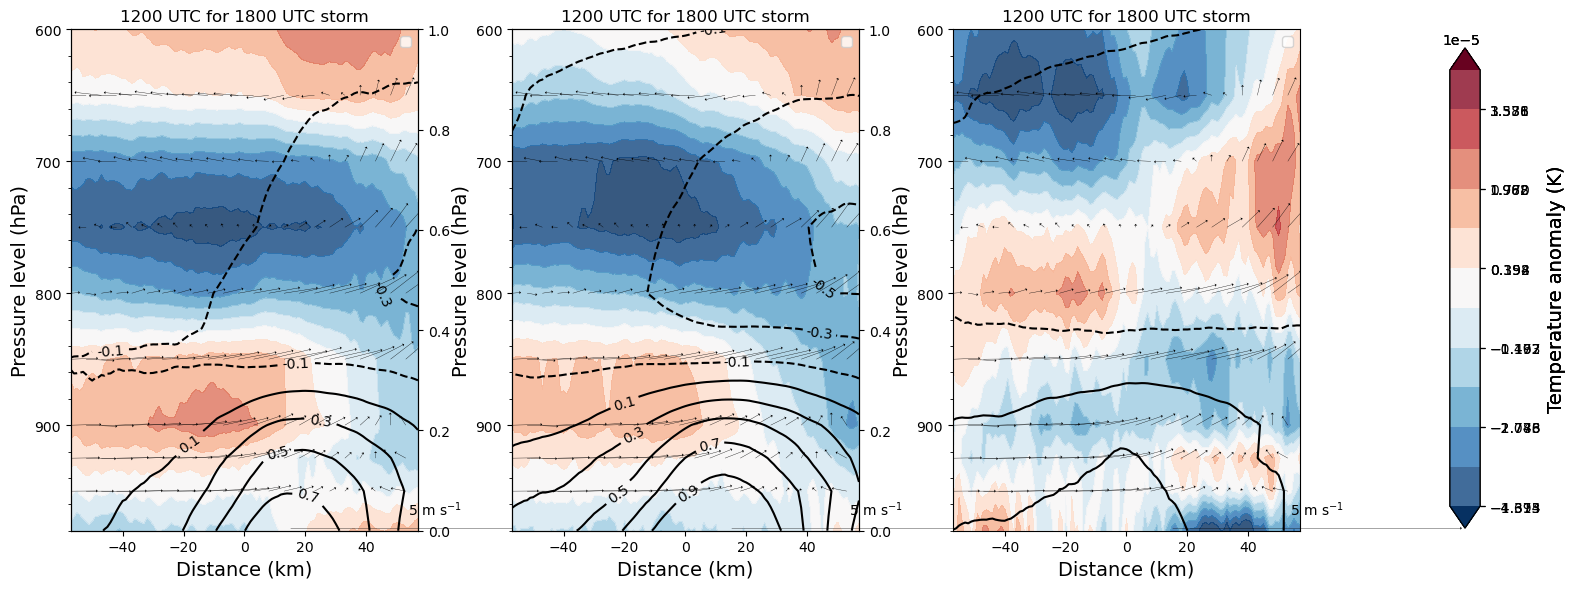

In [23]:
direction = 'XDIR'
merged_hist, merged_fut, merged_hist_mean, merged_fut_mean = get_anom_and_mean(direction='XDIR', strs='18')
file = 'hist_anom_all_'+strs+'h_'+direction+'.nc'
file2 = 'fut_anom_all_'+strs+'h_'+direction+'.nc'
    
ds = xr.open_dataset(cp4_path+file)
ds2 = xr.open_dataset(cp4_path+file2)

###########################

from matplotlib.ticker import MultipleLocator, AutoMinorLocator
st=1
sarrow = 0
lowres= 5

ucross = ds['u_cross']
cross = ds['omega_cross']*3

xquiv = ucross.longitude[sarrow::lowres]
yquiv = ucross.pressure[sarrow::st]

uu = ucross[sarrow::st, sarrow::lowres]
vv = cross[sarrow::st, sarrow::lowres]

f = plt.figure(figsize=(15,6), dpi=100)

for idx, data in enumerate([merged_hist, merged_fut]):

    ax = f.add_subplot(1,3,idx+1)

    div = calc_div(data)

    thresh = np.max(np.abs(np.percentile(div, [5, 95])))
    mp=ax.contourf(div.longitude, div.pressure, div, cmap='RdBu_r',levels=np.linspace(thresh * -1, thresh, 12), alpha=0.8, extend='both') #levels=np.linspace(-70,5,50), 

    plt.gca().invert_yaxis()
    num = ax.contour(data.longitude, data.pressure, (data['t_cross']), colors='k',levels=np.linspace(-0.9,0.9,10), alpha=1, extend='both') #levels=np.linspace(-70,5,50), 
    #ax.contour(ds_mean.longitude, ds_mean.pressure, (ds_mean['q_cross']-ds['q_cross'])*1000, colors='k',levels=np.linspace(12,15,10), alpha=1, extend='both') #levels=np.linspace(-70,5,50), 
    ax.clabel(num, inline=True, fontsize=10, fmt='%1.1f')
    
    qv = ax.quiver(xquiv, yquiv, uu, vv*-1, scale=6, width=0.001, headwidth=9)
    plt.quiverkey(qv,1.05, 0.005, 5, r'5 m s$^{-1}$')
    
    #num = ax.contour(data.latitude, data.pressure, (data['q_cross'])*1000, colors='k',levels=np.linspace(-2,2,10), alpha=1, extend='both') #levels=np.linspace(-70,5,50), 
    #ax.contour(ds_mean.longitude, ds_mean.pressure, (ds_mean['q_cross']-ds['q_cross'])*1000, colors='k',levels=np.linspace(12,15,10), alpha=1, extend='both') #levels=np.linspace(-70,5,50), 
    #ax.clabel(num, inline=True, fontsize=10, fmt='%1.1f')
    
    # Set major ticks locator for the y-axis to be every 100 steps
    ax.yaxis.set_major_locator(MultipleLocator(100))
    
    # Set minor ticks locator for the y-axis to be every 20 steps
    ax.yaxis.set_minor_locator(MultipleLocator(20))
    ax.set_ylim(980,600)
    
    ax.set_xlabel('Distance (km)', fontsize=14)
    ax.set_ylabel('Pressure level (hPa)', fontsize=14)
    ax2 = ax.twinx()

    # if idx == 0:
    #     ax2.plot(ds_mean.latitude, ds_mean['pblH'], label='PBLH_stormD hist')
    #     ax2.plot(ds_mean.latitude, ds_mean['pblH']-ds['pblH'], label='PBLH_clim hist')
    # # else:
    # #     ax2.plot(merged_hist.longitude, ds2_mean['pblH'], label='PBLH_stormD fut')
    # #     ax2.plot(ds_mean.longitude, ds2_mean['pblH']-ds2['pblH'], label='PBLH_clim fut')
        
    # ax2.set_ylim(0,3500)
    # print((ds_mean['pblH']-ds['pblH']).max())
    # print((ds_mean['pblH']).max())

    
    plt.title('', fontsize=14)
    
    # cbar.label('Relative humidity (%)')
    plt.title('1200 UTC for 1800 UTC storm')
    plt.legend()
    
    plt.tight_layout()
    f.subplots_adjust(right=0.87)
    cax = f.add_axes([0.97, 0.11, 0.02, 0.8])
    cbar = f.colorbar(mp, cax)
    cbar.set_label('Temperature anomaly (K)', fontsize=14)


ax = f.add_subplot(1,3,3)
diffdiv = calc_div(merged_fut)-calc_div(merged_hist)
thresh = np.max(np.abs(np.percentile(diffdiv, [5, 95])))
mp=ax.contourf(data.longitude, data.pressure, diffdiv , cmap='RdBu_r',levels=np.linspace(thresh * -1, thresh, 12), alpha=0.8, extend='both') #levels=np.linspace(-70,5,50), 

qv = ax.quiver(xquiv, yquiv, uu, vv*-1, scale=6, width=0.001, headwidth=9)
plt.quiverkey(qv,1.05, 0.005, 5, r'5 m s$^{-1}$')

num = ax.contour(data.longitude, data.pressure, (merged_fut['t_cross']-merged_hist['t_cross']), colors='k',levels=np.linspace(-0.9,0.9,10), alpha=1, extend='both')
#num = ax.contour(data.latitude, data.pressure, (merged_fut['q_cross']-merged_hist['q_cross'])*1000, colors='k',levels=np.linspace(-2,2,10), alpha=1, extend='both') #levels=np.linspace(-70,5,50), 
#ax.contour(ds_mean.longitude, ds_mean.pressure, (ds_mean['q_cross']-ds['q_cross'])*1000, colors='k',levels=np.linspace(12,15,10), alpha=1, extend='both') #levels=np.linspace(-70,5,50), 
#ax.clabel(num, inline=True, fontsize=10, fmt='%1.1f')

# Set major ticks locator for the y-axis to be every 100 steps
ax.yaxis.set_major_locator(MultipleLocator(100))

# Set minor ticks locator for the y-axis to be every 20 steps
ax.yaxis.set_minor_locator(MultipleLocator(20))
ax.set_ylim(980,600)

ax.set_xlabel('Distance (km)', fontsize=14)
ax.set_ylabel('Pressure level (hPa)', fontsize=14)

plt.title('', fontsize=14)

# cbar.label('Relative humidity (%)')
plt.title('1200 UTC for 1800 UTC storm')
plt.legend()

plt.tight_layout()
f.subplots_adjust(right=0.87)
cax = f.add_axes([0.97, 0.11, 0.02, 0.8])
cbar = f.colorbar(mp, cax)
cbar.set_label('Temperature anomaly (K)', fontsize=14)

In [133]:
def theta_anom(ds, ds_mean):
    #ipdb.set_trace()
    pes = units.Quantity(np.repeat(ds.pressure.values[:, np.newaxis],ds['t_cross'].values.shape[1], axis=1), 'hPa')

    tes = units.Quantity( (ds['t_cross']+ds_mean['t_cross']).values, 'K')
    theta_val_anom = calc.potential_temperature(pes, tes)

    tes = units.Quantity( (ds_mean['t_cross']).values, 'K')
    theta_val_mean = calc.potential_temperature(pes, tes)

    #ipdb.set_trace()

    theta = ds['t_cross'].copy(deep=True)
    theta.values = theta_val_anom-theta_val_mean

    return theta

In [134]:
def theta_e_anom(ds, ds_mean):
    #ipdb.set_trace()
    pes = units.Quantity(np.repeat(ds.pressure.values[:, np.newaxis],ds['t_cross'].values.shape[1], axis=1), 'hPa')

    tes = units.Quantity( (ds['t_cross']+ds_mean['t_cross']).values, 'K')
    qes = units.Quantity((ds['q_cross']+ds_mean['q_cross']).values, 'kg/kg')

    dew = calc.dewpoint_from_specific_humidity(pes, tes, qes)
    theta_val_anom = calc.equivalent_potential_temperature(pes, tes,dew)

    tes = units.Quantity( (ds_mean['t_cross']).values, 'K')
    qes = units.Quantity((ds_mean['q_cross']).values, 'kg/kg')
    dew = calc.dewpoint_from_specific_humidity(pes, tes, qes)
    theta_val_mean = calc.equivalent_potential_temperature(pes, tes,dew)

    #ipdb.set_trace()

    theta = ds['t_cross'].copy(deep=True)
    theta.values = theta_val_anom-theta_val_mean

    return theta

In [135]:
def theta_e(ds):
    #ipdb.set_trace()
    pes = units.Quantity(np.repeat(ds.pressure.values[:, np.newaxis],ds['t_cross'].values.shape[1], axis=1), 'hPa')

    tes = units.Quantity( (ds['t_cross']).values, 'K')
    qes = units.Quantity((ds['q_cross']).values, 'kg/kg')

    dew = calc.dewpoint_from_specific_humidity(pes, tes, qes)
    theta_val = calc.equivalent_potential_temperature(pes, tes,dew)

    #ipdb.set_trace()

    theta = ds['t_cross'].copy(deep=True)
    theta.values = theta_val

    return theta

In [136]:
def theta(ds):
    #ipdb.set_trace()
    pes = units.Quantity(np.repeat(ds.pressure.values[:, np.newaxis],ds['t_cross'].values.shape[1], axis=1), 'hPa')

    tes = units.Quantity( (ds['t_cross']).values, 'K')
    theta_val = calc.potential_temperature(pes, tes)

    #ipdb.set_trace()

    theta = ds['t_cross'].copy(deep=True)
    theta.values = theta_val

    return theta

In [137]:
def relative_humidity(ds):
    pes = units.Quantity(np.repeat(ds.pressure.values[:, np.newaxis],ds['t_cross'].values.shape[1], axis=1), 'hPa')
    tes = units.Quantity(ds['t_cross'].values, 'K')
    qes = units.Quantity(ds['q_cross'].values, 'kg/kg')

    rh = calc.relative_humidity_from_specific_humidity(pes, tes, qes)

    theta = ds['t_cross'].copy(deep=True)
    theta.values = rh

    return theta

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


<xarray.DataArray 'pblH' ()>
array(1099.99854822)
<xarray.DataArray 'pblH' ()>
array(1162.52179132)
<xarray.DataArray 'pblH' ()>
array(1099.99854822)
<xarray.DataArray 'pblH' ()>
array(1162.52179132)


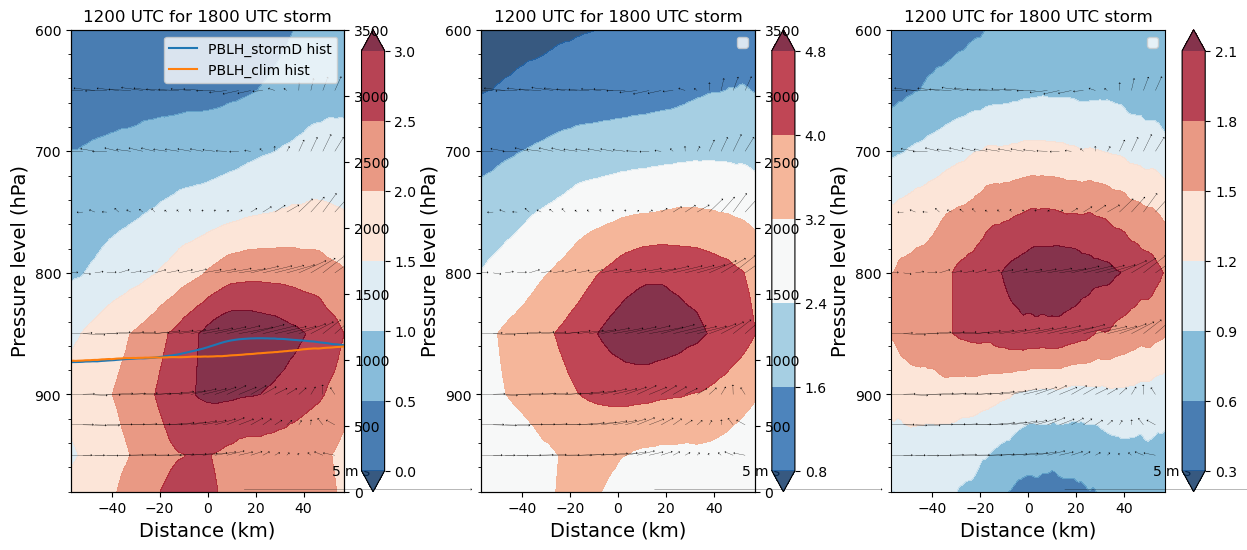

In [179]:
strs ='18'

file = 'hist_anom_all_'+strs+'h_XDIR.nc'
filem = 'hist_mean_all_'+strs+'h_XDIR.nc'
file2 = 'fut_anom_all_'+strs+'h_XDIR.nc'
file2m = 'fut_mean_all_'+strs+'h_XDIR.nc'

file2d = 'hist_anom_all_'+strs+'h_2d.nc'
file2d2 = 'fut_anom_all_'+strs+'h_2d.nc'
file2d_mean = 'hist_mean_all_'+strs+'h_2d.nc'
file2d2_mean = 'fut_mean_all_'+strs+'h_2d.nc'

###########################

ds = xr.open_dataset(cp4_path+file)
ds2 = xr.open_dataset(cp4_path+file2)

ds_mean = xr.open_dataset(cp4_path+filem)
ds2_mean = xr.open_dataset(cp4_path+file2m)

#######################################

ds2d = xr.open_dataset(cp4_path+file2d)
ds2d2 = xr.open_dataset(cp4_path+file2d2)

ds2d = ds2d.sel(latitude=slice(-6,6)).mean('latitude')
ds2d2 = ds2d2.sel(latitude=slice(-6,6)).mean('latitude')
ds3 = ds2d[['t2', 'q2','u_srfc', 'v_srfc']].rename({'t2' : 't_cross', 'q2' : 'q_cross', 'u_srfc' : 'u_cross', 'v_srfc' : 'v_cross'})
ds32 = ds2d2[['t2', 'q2','u_srfc', 'v_srfc']].rename({'t2' : 't_cross', 'q2' : 'q_cross', 'u_srfc' : 'u_cross',  'v_srfc' : 'v_cross'})

merged_hist = ds[['t_cross', 'q_cross', 'u_cross', 'v_cross']]
merged_fut = ds2[['t_cross', 'q_cross', 'u_cross', 'v_cross']]

# Add pressure level dimension to the extra dataset
pressure_level_980 = 980  # Define the pressure level value
ds3 = ds3.expand_dims(dim={'pressure': [pressure_level_980]})
ds3 = ds3.assign_coords(pressure=('pressure', [pressure_level_980]))
merged_hist = xr.concat([ds3, merged_hist], dim='pressure')

ds32 = ds32.expand_dims(dim={'pressure': [pressure_level_980]})
ds32 = ds32.assign_coords(pressure=('pressure', [pressure_level_980]))
merged_fut = xr.concat([ds32, merged_fut], dim='pressure')

#####################################

#######################################

ds2d = xr.open_dataset(cp4_path+file2d_mean)
ds2d2 = xr.open_dataset(cp4_path+file2d2_mean)

ds2d = ds2d.sel(latitude=slice(-6,6)).mean('latitude')
ds2d2 = ds2d2.sel(latitude=slice(-6,6)).mean('latitude')
ds3_m = ds2d[['t2', 'q2','u_srfc', 'v_srfc']].rename({'t2' : 't_cross', 'q2' : 'q_cross', 'u_srfc' : 'u_cross', 'v_srfc' : 'v_cross'})
ds32_m = ds2d2[['t2', 'q2','u_srfc', 'v_srfc']].rename({'t2' : 't_cross', 'q2' : 'q_cross', 'u_srfc' : 'u_cross',  'v_srfc' : 'v_cross'})

merged_hist_mean = ds_mean[['t_cross', 'q_cross', 'u_cross', 'v_cross']]
merged_fut_mean = ds2_mean[['t_cross', 'q_cross', 'u_cross', 'v_cross']]

# Add pressure level dimension to the extra dataset
pressure_level_980 = 980  # Define the pressure level value
ds3_m = ds3_m.expand_dims(dim={'pressure': [pressure_level_980]})
ds3_m = ds3_m.assign_coords(pressure=('pressure', [pressure_level_980]))
merged_hist_mean = xr.concat([ds3_m, merged_hist_mean], dim='pressure')

ds32_m = ds32_m.expand_dims(dim={'pressure': [pressure_level_980]})
ds32_m = ds32_m.assign_coords(pressure=('pressure', [pressure_level_980]))
merged_fut_mean = xr.concat([ds32_m, merged_fut_mean], dim='pressure')


##################################

from matplotlib.ticker import MultipleLocator, AutoMinorLocator
st=1
sarrow = 0
lowres= 5

ucross = ds['u_cross']
cross = ds['omega_cross']*3

xquiv = ucross.longitude[sarrow::lowres]
yquiv = ucross.pressure[sarrow::st]

uu = ucross[sarrow::st, sarrow::lowres]
vv = cross[sarrow::st, sarrow::lowres]

f = plt.figure(figsize=(15,6), dpi=100)

dat_means = [merged_hist_mean, merged_fut_mean]

for idx, data in enumerate([merged_hist, merged_fut]):

    ax = f.add_subplot(1,3,idx+1)
    
    div = theta_e_anom(data, dat_means[idx])
    thresh = np.nanmax(np.abs(np.percentile(div, [5, 95])))

    mp=ax.contourf(div.longitude, div.pressure, div, cmap='RdBu_r', alpha=0.8, extend='both') #levels=np.linspace(-70,5,50), 
    plt.colorbar(mp)
    
    cbar.set_label('Temperature anomaly (K)', fontsize=14)
    plt.gca().invert_yaxis()
    
    qv = ax.quiver(xquiv, yquiv, uu, vv*-1, scale=6, width=0.001, headwidth=9)
    plt.quiverkey(qv,1.05, 0.005, 5, r'5 m s$^{-1}$')
    
    #num = ax.contour(data.latitude, data.pressure, (data['q_cross'])*1000, colors='k',levels=np.linspace(-2,2,10), alpha=1, extend='both') #levels=np.linspace(-70,5,50), 
    #ax.contour(ds_mean.longitude, ds_mean.pressure, (ds_mean['q_cross']-ds['q_cross'])*1000, colors='k',levels=np.linspace(12,15,10), alpha=1, extend='both') #levels=np.linspace(-70,5,50), 
    #ax.clabel(num, inline=True, fontsize=10, fmt='%1.1f')
    
    # Set major ticks locator for the y-axis to be every 100 steps
    ax.yaxis.set_major_locator(MultipleLocator(100))
    
    # Set minor ticks locator for the y-axis to be every 20 steps
    ax.yaxis.set_minor_locator(MultipleLocator(20))
    ax.set_ylim(980,600)
    
    ax.set_xlabel('Distance (km)', fontsize=14)
    ax.set_ylabel('Pressure level (hPa)', fontsize=14)
    ax2 = ax.twinx()

    if idx == 0:
        ax2.plot(ds_mean.longitude, ds_mean['pblH'], label='PBLH_stormD hist')
        ax2.plot(ds_mean.longitude, ds_mean['pblH']-ds['pblH'], label='PBLH_clim hist')
    # else:
    #     ax2.plot(merged_hist.longitude, ds2_mean['pblH'], label='PBLH_stormD fut')
    #     ax2.plot(ds_mean.longitude, ds2_mean['pblH']-ds2['pblH'], label='PBLH_clim fut')
        
    ax2.set_ylim(0,3500)
    print((ds_mean['pblH']-ds['pblH']).max())
    print((ds_mean['pblH']).max())

    
    plt.title('', fontsize=14)
    
    # cbar.label('Relative humidity (%)')
    plt.title('1200 UTC for 1800 UTC storm')
    plt.legend()


ax = f.add_subplot(1,3,3)
diffdiv = theta_e_anom(merged_fut, merged_fut_mean)-theta_e_anom(merged_hist, merged_hist_mean)
thresh = np.max(np.abs(np.percentile(diffdiv, [25, 75])))
mp=ax.contourf(data.longitude, data.pressure, diffdiv , cmap='RdBu_r', alpha=0.8, extend='both') #levels=np.linspace(-70,5,50), 
plt.colorbar(mp)
qv = ax.quiver(xquiv, yquiv, uu, vv*-1, scale=6, width=0.001, headwidth=9)
plt.quiverkey(qv,1.05, 0.005, 5, r'5 m s$^{-1}$')

#num = ax.contour(data.latitude, data.pressure, (merged_fut['q_cross']-merged_hist['q_cross'])*1000, colors='k',levels=np.linspace(-2,2,10), alpha=1, extend='both') #levels=np.linspace(-70,5,50), 
#ax.contour(ds_mean.longitude, ds_mean.pressure, (ds_mean['q_cross']-ds['q_cross'])*1000, colors='k',levels=np.linspace(12,15,10), alpha=1, extend='both') #levels=np.linspace(-70,5,50), 
#ax.clabel(num, inline=True, fontsize=10, fmt='%1.1f')

# Set major ticks locator for the y-axis to be every 100 steps
ax.yaxis.set_major_locator(MultipleLocator(100))

# Set minor ticks locator for the y-axis to be every 20 steps
ax.yaxis.set_minor_locator(MultipleLocator(20))
ax.set_ylim(980,600)

ax.set_xlabel('Distance (km)', fontsize=14)
ax.set_ylabel('Pressure level (hPa)', fontsize=14)

plt.title('', fontsize=14)

# cbar.label('Relative humidity (%)')
plt.title('1200 UTC for 1800 UTC storm')
plt.legend()


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


<xarray.DataArray 'pblH' ()>
array(0.)
<xarray.DataArray 'pblH' ()>
array(1162.52179132)
<xarray.DataArray 'pblH' ()>
array(0.)
<xarray.DataArray 'pblH' ()>
array(1162.52179132)


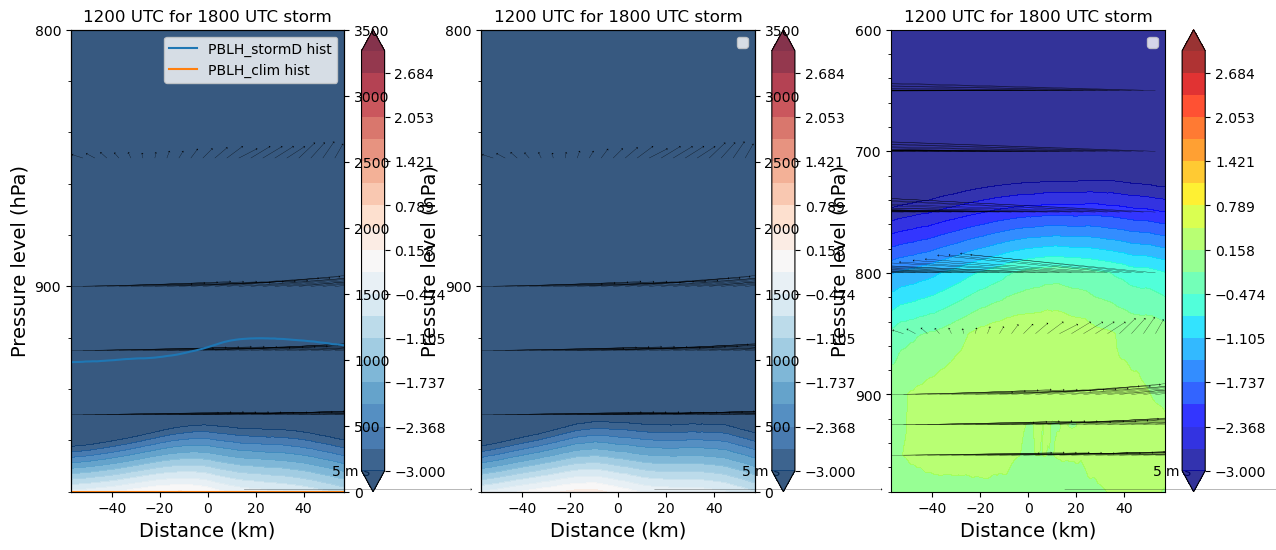

In [155]:
strs ='18'

file = 'hist_mean_all_'+strs+'h_XDIR.nc'
filem = 'hist_mean_all_'+strs+'h_XDIR.nc'
file2 = 'fut_mean_all_'+strs+'h_XDIR.nc'
file2m = 'fut_mean_all_'+strs+'h_XDIR.nc'

file2d = 'hist_mean_all_'+strs+'h_2d.nc'
file2d2 = 'fut_mean_all_'+strs+'h_2d.nc'
file2d_mean = 'hist_mean_all_'+strs+'h_2d.nc'
file2d2_mean = 'fut_mean_all_'+strs+'h_2d.nc'

###########################

ds = xr.open_dataset(cp4_path+file)
ds2 = xr.open_dataset(cp4_path+file2)

ds_mean = xr.open_dataset(cp4_path+filem)
ds2_mean = xr.open_dataset(cp4_path+file2m)

#######################################

ds2d = xr.open_dataset(cp4_path+file2d)
ds2d2 = xr.open_dataset(cp4_path+file2d2)

ds2d = ds2d.sel(latitude=slice(-6,6)).mean('latitude')
ds2d2 = ds2d2.sel(latitude=slice(-6,6)).mean('latitude')
ds3 = ds2d[['t2', 'q2','u_srfc', 'v_srfc']].rename({'t2' : 't_cross', 'q2' : 'q_cross', 'u_srfc' : 'u_cross', 'v_srfc' : 'v_cross'})
ds32 = ds2d2[['t2', 'q2','u_srfc', 'v_srfc']].rename({'t2' : 't_cross', 'q2' : 'q_cross', 'u_srfc' : 'u_cross',  'v_srfc' : 'v_cross'})

merged_hist = ds[['t_cross', 'q_cross', 'u_cross', 'v_cross']]
merged_fut = ds2[['t_cross', 'q_cross', 'u_cross', 'v_cross']]

# Add pressure level dimension to the extra dataset
pressure_level_980 = 980  # Define the pressure level value
ds3 = ds3.expand_dims(dim={'pressure': [pressure_level_980]})
ds3 = ds3.assign_coords(pressure=('pressure', [pressure_level_980]))
merged_hist = xr.concat([ds3, merged_hist], dim='pressure')

ds32 = ds32.expand_dims(dim={'pressure': [pressure_level_980]})
ds32 = ds32.assign_coords(pressure=('pressure', [pressure_level_980]))
merged_fut = xr.concat([ds32, merged_fut], dim='pressure')

#####################################


from matplotlib.ticker import MultipleLocator, AutoMinorLocator
st=1
sarrow = 0
lowres= 5

ucross = ds['u_cross']
cross = ds['omega_cross']*3

xquiv = ucross.longitude[sarrow::lowres]
yquiv = ucross.pressure[sarrow::st]

uu = ucross[sarrow::st, sarrow::lowres]
vv = cross[sarrow::st, sarrow::lowres]

f = plt.figure(figsize=(15,6), dpi=100)

dat_means = [merged_hist_mean, merged_fut_mean]

for idx, data in enumerate([merged_hist, merged_fut]):

    ax = f.add_subplot(1,3,idx+1)
    
    div = theta_e(data)
    #ipdb.set_trace()
    div = (div-div[0,59])
    thresh = np.nanmax(np.abs(np.percentile(div, [5, 95])))
    #ipdb.set_trace()
    mp=ax.contourf(div.longitude, div.pressure, div, cmap='RdBu_r', alpha=0.8, extend='both', levels=np.linspace(-3,3,20)) #levels=np.linspace(-70,5,50), 
    plt.colorbar(mp)
    
    cbar.set_label('Temperature anomaly (K)', fontsize=14)
    plt.gca().invert_yaxis()
    
    qv = ax.quiver(xquiv, yquiv, uu, vv*-1, scale=6, width=0.001, headwidth=9)
    plt.quiverkey(qv,1.05, 0.005, 5, r'5 m s$^{-1}$')
    
    #num = ax.contour(data.latitude, data.pressure, (data['q_cross'])*1000, colors='k',levels=np.linspace(-2,2,10), alpha=1, extend='both') #levels=np.linspace(-70,5,50), 
    #ax.contour(ds_mean.longitude, ds_mean.pressure, (ds_mean['q_cross']-ds['q_cross'])*1000, colors='k',levels=np.linspace(12,15,10), alpha=1, extend='both') #levels=np.linspace(-70,5,50), 
    #ax.clabel(num, inline=True, fontsize=10, fmt='%1.1f')
    
    # Set major ticks locator for the y-axis to be every 100 steps
    ax.yaxis.set_major_locator(MultipleLocator(100))
    
    # Set minor ticks locator for the y-axis to be every 20 steps
    ax.yaxis.set_minor_locator(MultipleLocator(20))
    ax.set_ylim(980,800)
    
    ax.set_xlabel('Distance (km)', fontsize=14)
    ax.set_ylabel('Pressure level (hPa)', fontsize=14)
    ax2 = ax.twinx()

    if idx == 0:
        ax2.plot(ds_mean.longitude, ds_mean['pblH'], label='PBLH_stormD hist')
        ax2.plot(ds_mean.longitude, ds_mean['pblH']-ds['pblH'], label='PBLH_clim hist')
    # else:
    #     ax2.plot(merged_hist.longitude, ds2_mean['pblH'], label='PBLH_stormD fut')
    #     ax2.plot(ds_mean.longitude, ds2_mean['pblH']-ds2['pblH'], label='PBLH_clim fut')
        
    ax2.set_ylim(0,3500)
    print((ds_mean['pblH']-ds['pblH']).max())
    print((ds_mean['pblH']).max())

    
    plt.title('', fontsize=14)
    
    # cbar.label('Relative humidity (%)')
    plt.title('1200 UTC for 1800 UTC storm')
    plt.legend()


ax = f.add_subplot(1,3,3)
divfut = theta_e(merged_fut)
divfut = (divfut-divfut[0,59])
divhist = theta_e(merged_hist)
divhist = (divhist-divhist[0,59])
thresh = np.max(np.abs(np.percentile(diffdiv, [25, 75])))
mp=ax.contourf(data.longitude, data.pressure, divfut-divhist , cmap='jet', alpha=0.8, extend='both', levels=np.linspace(-3,3,20)) #levels=np.linspace(-70,5,50), 
plt.colorbar(mp)
qv = ax.quiver(xquiv, yquiv, uu, vv*-1, scale=6, width=0.001, headwidth=9)
plt.quiverkey(qv,1.05, 0.005, 5, r'5 m s$^{-1}$')

#num = ax.contour(data.latitude, data.pressure, (merged_fut['q_cross']-merged_hist['q_cross'])*1000, colors='k',levels=np.linspace(-2,2,10), alpha=1, extend='both') #levels=np.linspace(-70,5,50), 
#ax.contour(ds_mean.longitude, ds_mean.pressure, (ds_mean['q_cross']-ds['q_cross'])*1000, colors='k',levels=np.linspace(12,15,10), alpha=1, extend='both') #levels=np.linspace(-70,5,50), 
#ax.clabel(num, inline=True, fontsize=10, fmt='%1.1f')

# Set major ticks locator for the y-axis to be every 100 steps
ax.yaxis.set_major_locator(MultipleLocator(100))

# Set minor ticks locator for the y-axis to be every 20 steps
ax.yaxis.set_minor_locator(MultipleLocator(20))
ax.set_ylim(980,600)

ax.set_xlabel('Distance (km)', fontsize=14)
ax.set_ylabel('Pressure level (hPa)', fontsize=14)

plt.title('', fontsize=14)

# cbar.label('Relative humidity (%)')
plt.title('1200 UTC for 1800 UTC storm')
plt.legend()

In [164]:
def skew_vars(ds):
    #ipdb.set_trace()
    pes = units.Quantity(ds.pressure.values, 'hPa')

    tes = units.Quantity( (ds['t_cross']).values[:,58], 'K')
    qes = units.Quantity((ds['q_cross']).values[:,58], 'kg/kg')

    dew = calc.dewpoint_from_specific_humidity(pes, tes, qes)

    return pes , tes, dew

In [168]:
from metpy.plots import add_metpy_logo, SkewT
from metpy.units import units
import metpy.calc as mpcalc

In [191]:
strs ='18'

file = 'hist_mean_all_'+strs+'h_XDIR.nc'
filem = 'hist_mean_all_'+strs+'h_XDIR.nc'
file2 = 'fut_mean_all_'+strs+'h_XDIR.nc'
file2m = 'fut_mean_all_'+strs+'h_XDIR.nc'

file2d = 'hist_mean_all_'+strs+'h_2d.nc'
file2d2 = 'fut_mean_all_'+strs+'h_2d.nc'
file2d_mean = 'hist_mean_all_'+strs+'h_2d.nc'
file2d2_mean = 'fut_mean_all_'+strs+'h_2d.nc'

###########################

ds = xr.open_dataset(cp4_path+file)
ds2 = xr.open_dataset(cp4_path+file2)

ds_mean = xr.open_dataset(cp4_path+filem)
ds2_mean = xr.open_dataset(cp4_path+file2m)

#######################################

ds2d = xr.open_dataset(cp4_path+file2d)
ds2d2 = xr.open_dataset(cp4_path+file2d2)

ds2d = ds2d.sel(latitude=slice(-6,6)).mean('latitude')
ds2d2 = ds2d2.sel(latitude=slice(-6,6)).mean('latitude')
ds3 = ds2d[['t2', 'q2','u_srfc', 'v_srfc']].rename({'t2' : 't_cross', 'q2' : 'q_cross', 'u_srfc' : 'u_cross', 'v_srfc' : 'v_cross'})
ds32 = ds2d2[['t2', 'q2','u_srfc', 'v_srfc']].rename({'t2' : 't_cross', 'q2' : 'q_cross', 'u_srfc' : 'u_cross',  'v_srfc' : 'v_cross'})

merged_hist = ds[['t_cross', 'q_cross', 'u_cross', 'v_cross']]
merged_fut = ds2[['t_cross', 'q_cross', 'u_cross', 'v_cross']]

# Add pressure level dimension to the extra dataset
pressure_level_980 = 980  # Define the pressure level value
ds3 = ds3.expand_dims(dim={'pressure': [pressure_level_980]})
ds3 = ds3.assign_coords(pressure=('pressure', [pressure_level_980]))
merged_hist = xr.concat([ds3, merged_hist], dim='pressure')

ds32 = ds32.expand_dims(dim={'pressure': [pressure_level_980]})
ds32 = ds32.assign_coords(pressure=('pressure', [pressure_level_980]))
merged_fut = xr.concat([ds32, merged_fut], dim='pressure')

#####################################

from matplotlib.ticker import MultipleLocator, AutoMinorLocator
st=1
sarrow = 0
lowres= 5

ucross = ds['u_cross']
cross = ds['omega_cross']*3

xquiv = ucross.longitude[sarrow::lowres]
yquiv = ucross.pressure[sarrow::st]

uu = ucross[sarrow::st, sarrow::lowres]
vv = cross[sarrow::st, sarrow::lowres]


def skewp(data, mean):

    fig = plt.figure(figsize=(9, 9))


    p,T,Td = skew_vars(data)

    ax = f.add_subplot(1,2,idx+1)
    
    
    skew = SkewT(fig, rotation=45)
    
    # Plot the data using normal plotting functions, in this case using
    # log scaling in Y, as dictated by the typical meteorological plot.
    skew.plot(p, T, 'r')
    skew.plot(p, Td, 'g')
    
    skew.ax.set_ylim(1000, 400)
    skew.ax.set_xlim(10, 40)
    
    
    # Calculate LCL height and plot as black dot. Because `p`'s first value is
    # ~1000 mb and its last value is ~250 mb, the `0` index is selected for
    # `p`, `T`, and `Td` to lift the parcel from the surface. If `p` was inverted,
    # i.e. start from low value, 250 mb, to a high value, 1000 mb, the `-1` index
    # should be selected.
    lcl_pressure, lcl_temperature = mpcalc.lcl(p[0], T[0], Td[0])
    skew.plot(lcl_pressure, lcl_temperature, 'ko', markerfacecolor='black')
    
    # Calculate full parcel profile and add to plot as black line
    prof = mpcalc.parcel_profile(p, T[0], Td[0]).to('degC')
    skew.plot(p, prof, 'k', linewidth=2)
    
    # Shade areas of CAPE and CIN
    skew.shade_cin(p, T, prof, Td)
    skew.shade_cape(p, T, prof)
    
    # An example of a slanted line at constant T -- in this case the 0
    # isotherm
    skew.ax.axvline(0, color='c', linestyle='--', linewidth=2)
    
    # Add the relevant special lines
    skew.plot_dry_adiabats()
    skew.plot_moist_adiabats()
    skew.plot_mixing_lines()

    p, T, Td = skew_vars(mean)

# Plot the data using normal plotting functions, in this case using
    # log scaling in Y, as dictated by the typical meteorological plot.
    skew.plot(p, T, 'orange')
    skew.plot(p, Td, 'blue')
    
    skew.ax.set_ylim(1000, 400)
    skew.ax.set_xlim(10, 40)
    
    
    # Calculate LCL height and plot as black dot. Because `p`'s first value is
    # ~1000 mb and its last value is ~250 mb, the `0` index is selected for
    # `p`, `T`, and `Td` to lift the parcel from the surface. If `p` was inverted,
    # i.e. start from low value, 250 mb, to a high value, 1000 mb, the `-1` index
    # should be selected.
    lcl_pressure, lcl_temperature = mpcalc.lcl(p[0], T[0], Td[0])
    skew.plot(lcl_pressure, lcl_temperature, 'ko', markerfacecolor='gold')
    
    # Calculate full parcel profile and add to plot as black line
    prof = mpcalc.parcel_profile(p, T[0], Td[0]).to('degC')
    skew.plot(p, prof, 'purple', linewidth=2)
    
    # Shade areas of CAPE and CIN
    skew.shade_cin(p, T, prof, Td)
    skew.shade_cape(p, T, prof)
    
    

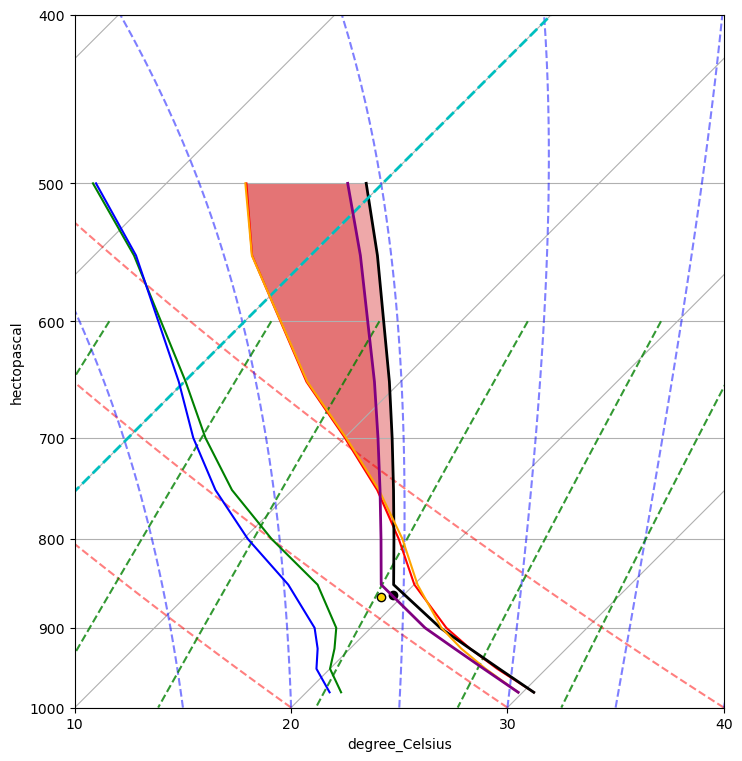

In [193]:
skewp(merged_hist, merged_hist_clim)

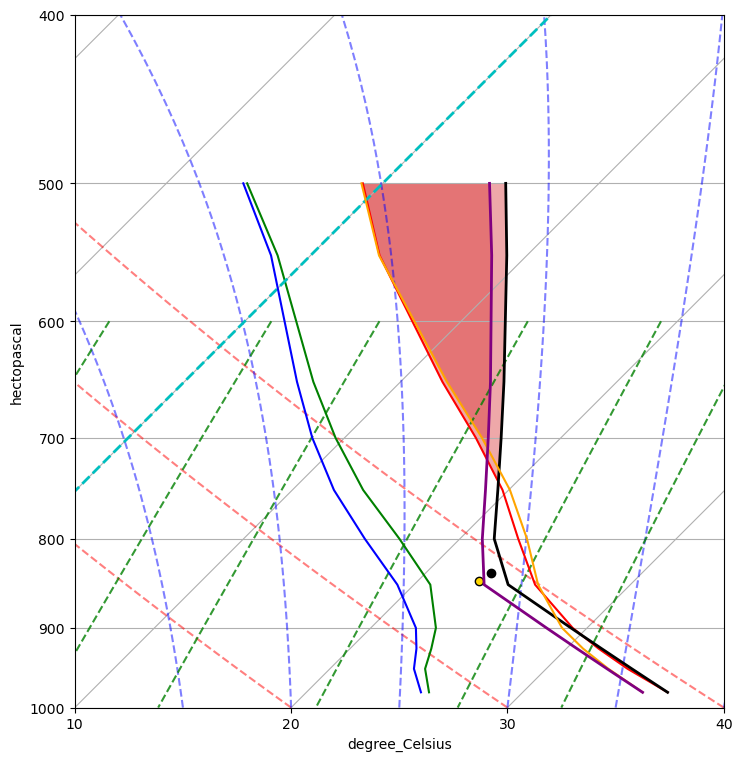

In [194]:
skewp(merged_fut, merged_fut_clim)

In [188]:
strs ='18'

file = 'hist_anom_all_'+strs+'h_XDIR.nc'
filem = 'hist_mean_all_'+strs+'h_XDIR.nc'
file2 = 'fut_anom_all_'+strs+'h_XDIR.nc'
file2m = 'fut_mean_all_'+strs+'h_XDIR.nc'

file2d = 'hist_anom_all_'+strs+'h_2d.nc'
file2d2 = 'fut_anom_all_'+strs+'h_2d.nc'
file2d_mean = 'hist_mean_all_'+strs+'h_2d.nc'
file2d2_mean = 'fut_mean_all_'+strs+'h_2d.nc'

###########################

ds = xr.open_dataset(cp4_path+file)
ds2 = xr.open_dataset(cp4_path+file2)

ds_mean = xr.open_dataset(cp4_path+filem)
ds2_mean = xr.open_dataset(cp4_path+file2m)

#######################################

ds2d = xr.open_dataset(cp4_path+file2d)
ds2d2 = xr.open_dataset(cp4_path+file2d2)

ds2d = ds2d.sel(latitude=slice(-6,6)).mean('latitude')
ds2d2 = ds2d2.sel(latitude=slice(-6,6)).mean('latitude')
ds3 = ds2d[['t2', 'q2','u_srfc', 'v_srfc']].rename({'t2' : 't_cross', 'q2' : 'q_cross', 'u_srfc' : 'u_cross', 'v_srfc' : 'v_cross'})
ds32 = ds2d2[['t2', 'q2','u_srfc', 'v_srfc']].rename({'t2' : 't_cross', 'q2' : 'q_cross', 'u_srfc' : 'u_cross',  'v_srfc' : 'v_cross'})

merged_hist = ds[['t_cross', 'q_cross', 'u_cross', 'v_cross']]
merged_fut = ds2[['t_cross', 'q_cross', 'u_cross', 'v_cross']]

# Add pressure level dimension to the extra dataset
pressure_level_980 = 980  # Define the pressure level value
ds3 = ds3.expand_dims(dim={'pressure': [pressure_level_980]})
ds3 = ds3.assign_coords(pressure=('pressure', [pressure_level_980]))
merged_hist = xr.concat([ds3, merged_hist], dim='pressure')

ds32 = ds32.expand_dims(dim={'pressure': [pressure_level_980]})
ds32 = ds32.assign_coords(pressure=('pressure', [pressure_level_980]))
merged_fut = xr.concat([ds32, merged_fut], dim='pressure')

#####################################

#######################################

ds2d = xr.open_dataset(cp4_path+file2d_mean)
ds2d2 = xr.open_dataset(cp4_path+file2d2_mean)

ds2d = ds2d.sel(latitude=slice(-6,6)).mean('latitude')
ds2d2 = ds2d2.sel(latitude=slice(-6,6)).mean('latitude')
ds3_m = ds2d[['t2', 'q2','u_srfc', 'v_srfc']].rename({'t2' : 't_cross', 'q2' : 'q_cross', 'u_srfc' : 'u_cross', 'v_srfc' : 'v_cross'})
ds32_m = ds2d2[['t2', 'q2','u_srfc', 'v_srfc']].rename({'t2' : 't_cross', 'q2' : 'q_cross', 'u_srfc' : 'u_cross',  'v_srfc' : 'v_cross'})

merged_hist_mean = ds_mean[['t_cross', 'q_cross', 'u_cross', 'v_cross']]
merged_fut_mean = ds2_mean[['t_cross', 'q_cross', 'u_cross', 'v_cross']]

# Add pressure level dimension to the extra dataset
pressure_level_980 = 980  # Define the pressure level value
ds3_m = ds3_m.expand_dims(dim={'pressure': [pressure_level_980]})
ds3_m = ds3_m.assign_coords(pressure=('pressure', [pressure_level_980]))
merged_hist_mean = xr.concat([ds3_m, merged_hist_mean], dim='pressure')

ds32_m = ds32_m.expand_dims(dim={'pressure': [pressure_level_980]})
ds32_m = ds32_m.assign_coords(pressure=('pressure', [pressure_level_980]))
merged_fut_mean = xr.concat([ds32_m, merged_fut_mean], dim='pressure')

merged_hist_clim = merged_hist_mean-merged_hist
merged_fut_clim = merged_fut_mean-merged_fut